In [2]:
%pylab inline
import uncertainties
# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path+".TKA", 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset


def vertrag(x, ux, y):
    """determines, whether your value is compatible with a given value"""
    return abs(x - y) / ux


Populating the interactive namespace from numpy and matplotlib


In [3]:
calibr = array([
    array([  # ch
        183,
        180,
        177,
        173,
        166,
        153,
        139,
        126,
        112,
        99,
        98,
        85,
        71,
        58,
        54,
        51,
        48,
        44,
        41,
        38,
        35,
        32,
        30,
        28,
        28,
        27,
        27,
        27
    ]),array([  # t
        190.5,
        186.5,
        182.5,
        178.5,
        170.5,
        154.5,
        132.5,
        122.5,
        106.5,
        90.5,
        90,
        74,
        58,
        42,
        38,
        34,
        30,
        26,
        22,
        18,
        14,
        10,
        6,
        2,
        1.5,
        1,
        0.5,
        0
    ])+3*2.5
])

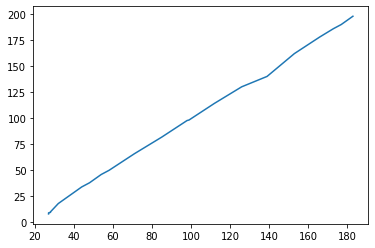

In [4]:
plt.plot(*calibr)

In [5]:
def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)

def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x

def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

In [6]:
[slope,offset], R_2=linfit_pm(*calibr)

In [7]:
R_2

0.9991711789852757

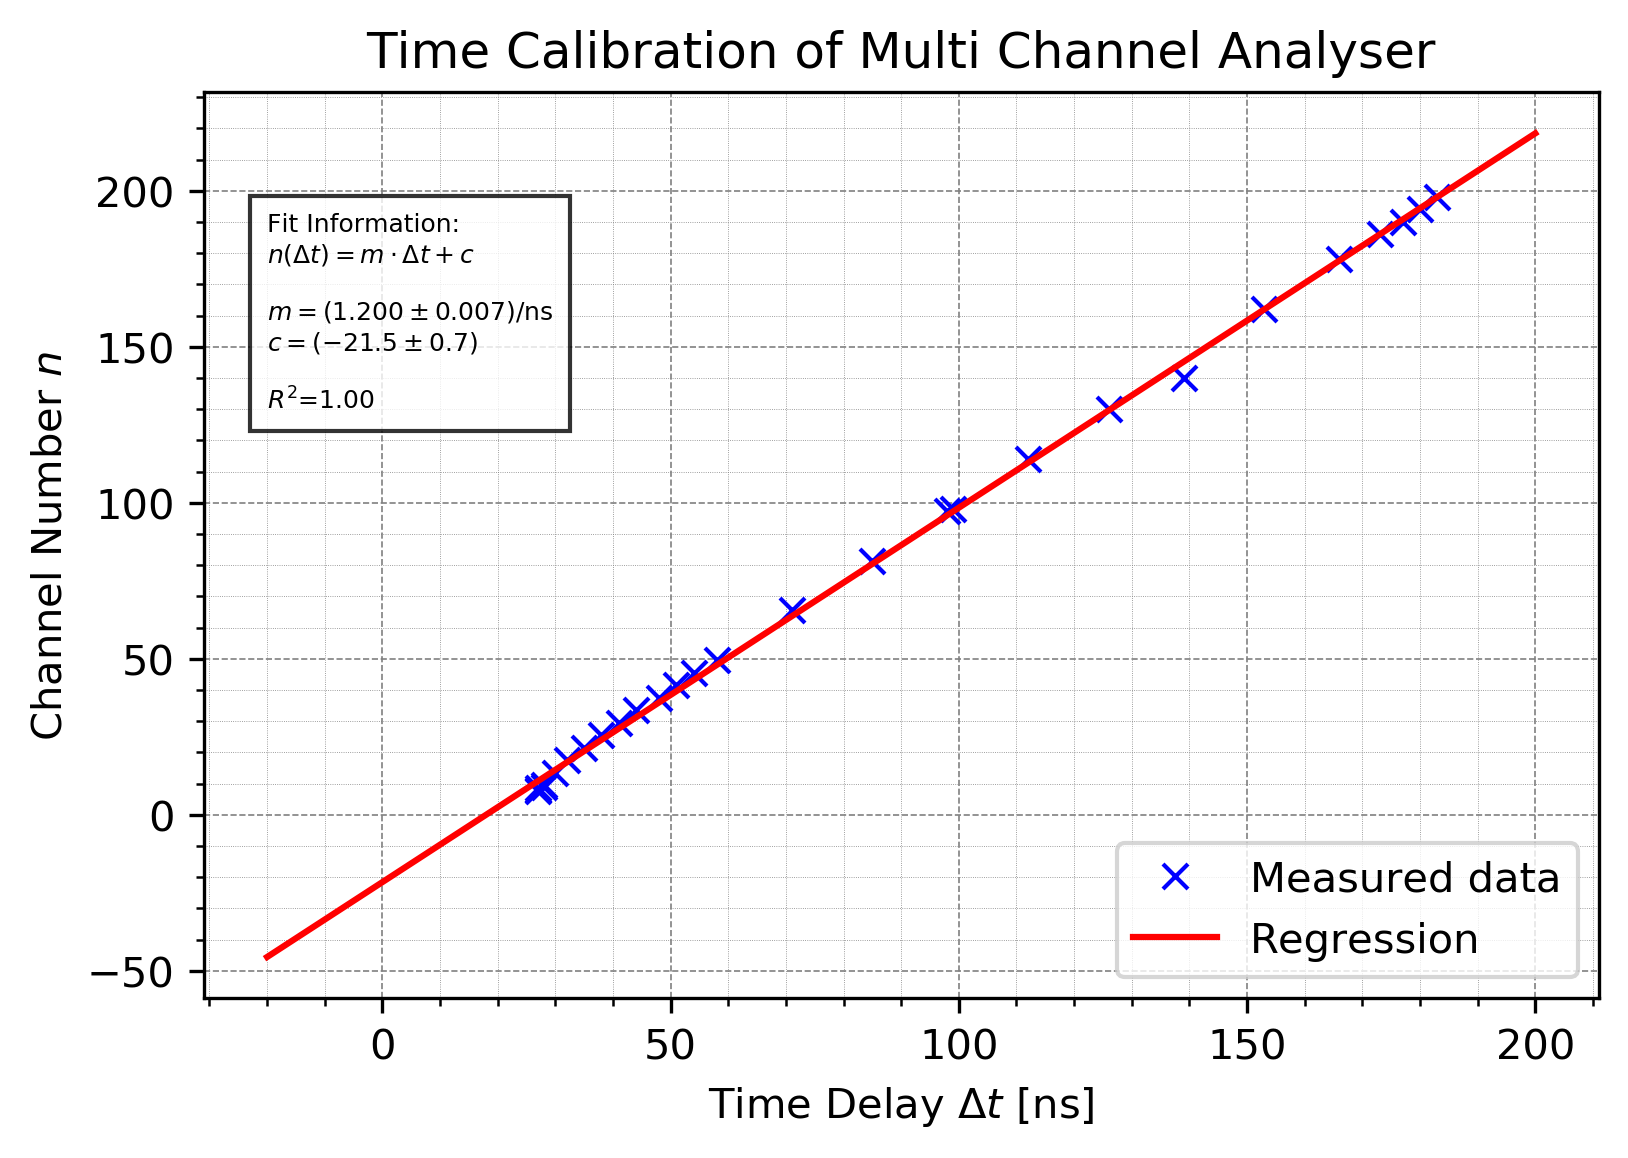

In [8]:
from uncertainties import unumpy as unp
x=np.linspace(-20,200)
y=x*slope+offset
plt.figure(dpi=300)
plt.title('Time Calibration of Multi Channel Analyser')
plt.ylabel('Channel Number $n$')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')

plt.plot(calibr[0],calibr[1],"bx",label="Measured data")
plt.plot(x,unp.nominal_values(y),"r-",label="Regression")

plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()

plt.legend(loc=4)
plt.text(-20, 130,
         'Fit Information:\n$n(\\Delta t)=m\\cdot \\Delta t +c $\n\n$m=({:.3f}\\pm {:.3f})$/ns\n$c=({:.1f}\\pm {:.1f})$\n\n$R^2$={:.2f}'
         .format(val(slope),err(slope),val(offset),err(offset),R_2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=6)
plt.savefig("time_cal.png")
plt.show()

# Auswertung der Hauptmessung

In [9]:
data_raw = read("Hauptmessung")
data = [data_raw[0],[]]
#fehler: sqrt(n)
for i in range(len(data_raw[1])):
    data[1].append(uncertainties.ufloat(data_raw[1][i],np.sqrt(data_raw[1][i])))
len(data[1])
data[0]=(data[0]-offset)/slope

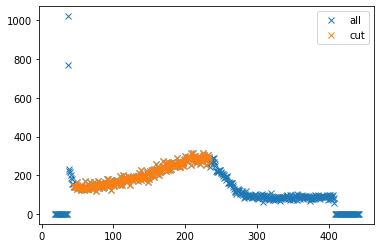

In [10]:
start,stop = 32,260
x = data[0][start:stop]
y = data[1][start:stop]
plt.plot(val(data[0]),val(data[1]),"x",label="all")
plt.plot(val(x),val(y),"x",label="cut")
plt.legend()
plt.show()

In [11]:
#vals,x_2=expfit_pm(val(x),val(y),p0=[30,0.1,1,1])
#print(vals)

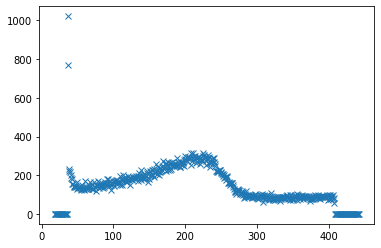

NameError: name 'vals' is not defined

In [12]:
xx = np.linspace(start,stop)
plt.plot(val(data[0]),val(data[1]),"x")
#plt.plot(xx,eexp(xx,*val(vals)))
plt.show()
print("T_1/2",np.log(2)/vals[1])
vertrag(98,np.log(2)/vals[1],np.log(2)/vals[1]**2)

# Background

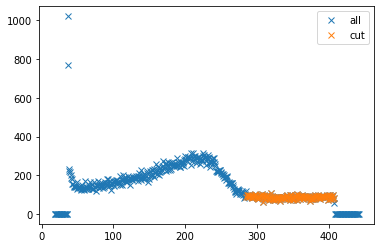

In [16]:
start2,stop2 = 321,468
x = data[0][start2:stop2]
y = data[1][start2:stop2]
plt.plot(*val(data),"x",label="all")
plt.plot(val(x),val(y),"x",label="cut")
plt.legend()
plt.show()

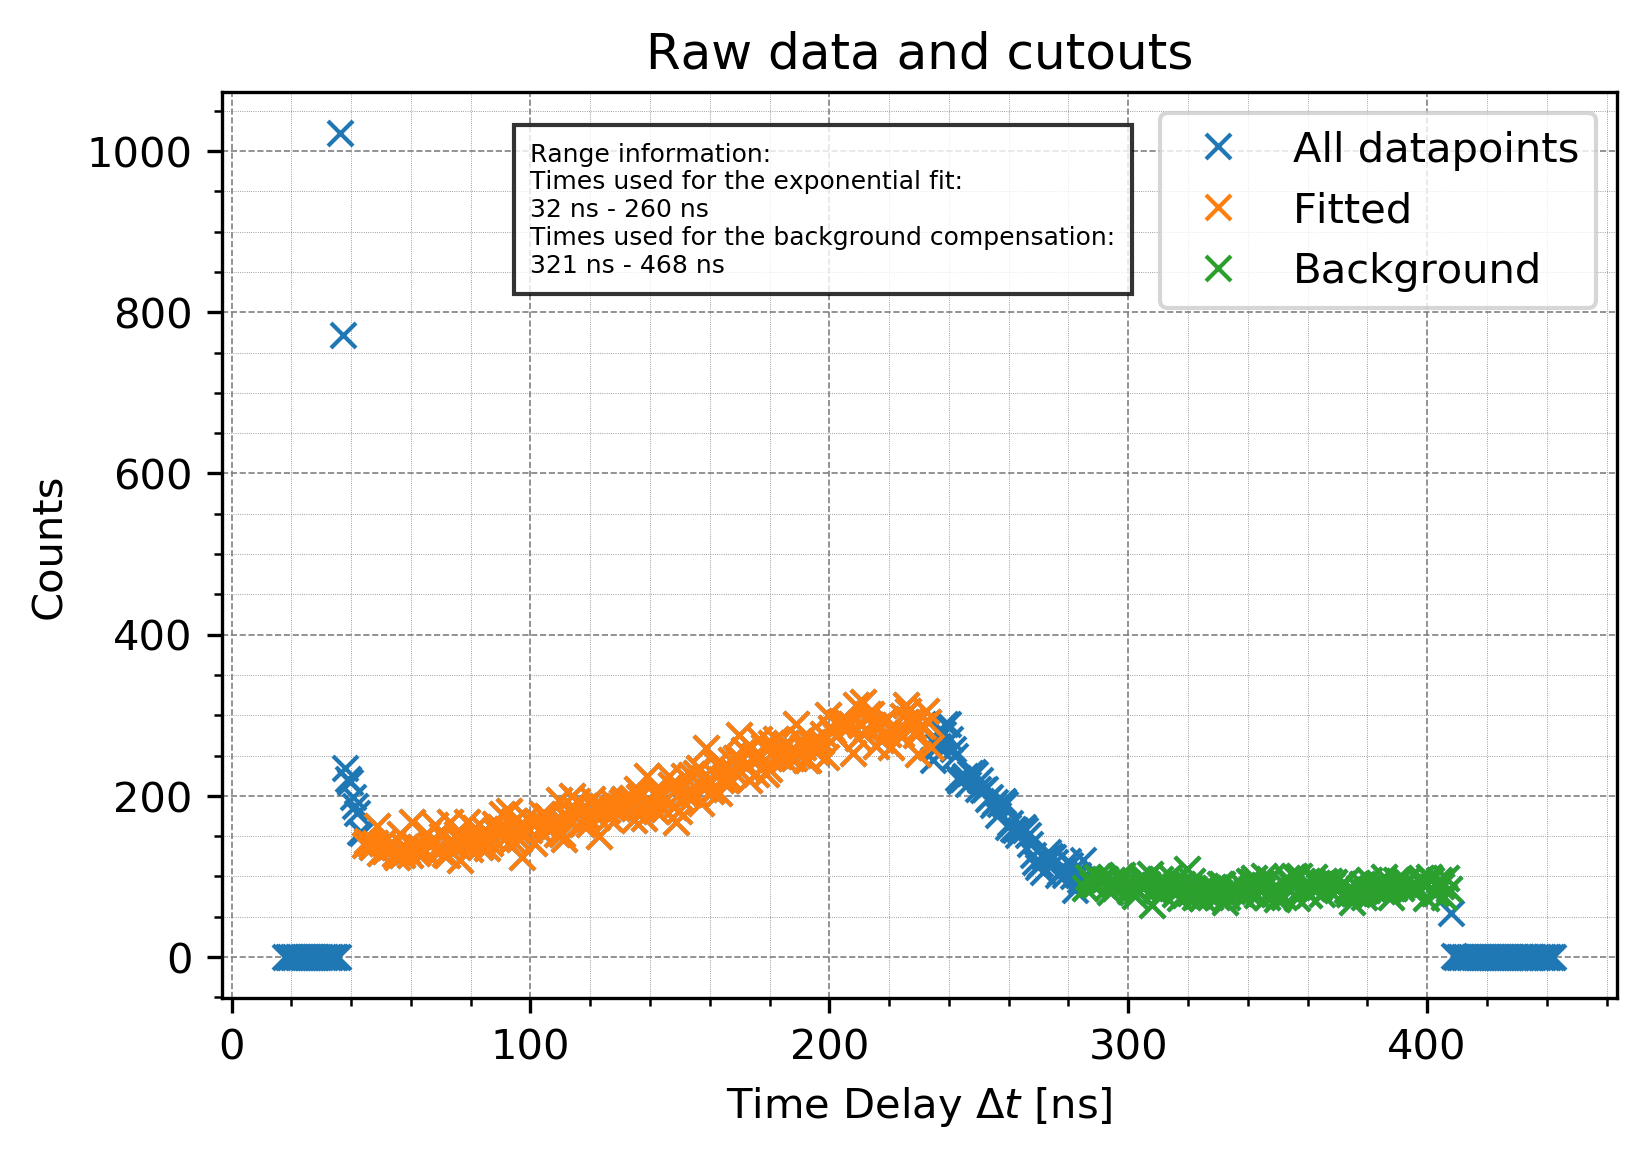

In [17]:
from uncertainties import unumpy as unp
x=np.linspace(-20,200)
y=x*slope+offset
plt.figure(dpi=300)
plt.title(r'Raw data and cutouts')
plt.ylabel(r'Counts')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')

plt.plot(val(data[0]),val(data[1]),"x",label="All datapoints")
plt.plot(val(data[0][start:stop]),val(data[1][start:stop]),"x",label="Fitted")
plt.plot(val(data[0][start2:stop2]),val(data[1][start2:stop2]),"x",label="Background")


plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()

plt.legend()
plt.text(100, 850,'Range information:\nTimes used for the exponential fit:\n{:} ns - {:} ns \nTimes used for the background compensation:\n{:} ns - {:} ns '.format(start,stop,start2,stop2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=6)

plt.savefig("raw_ranges.png")
plt.show()

In [18]:
start2,stop2 = 321,468
x = data[0][start2:stop2]
y = data[1][start2:stop2]

[slope2,offset2],R_2_2 = linfit_pm(val(x),val(y))
offset3 = uncertainties.ufloat(val(mean(y)),err(mean(y)))
print("mean")
print(offset3)
print("fit")
print(slope2)
print(offset2)
print(R_2_2)
#offset2=offset3

mean
87.0+/-0.8
fit
0.000+/-0.020
87+/-7
-4.4853010194856324e-13


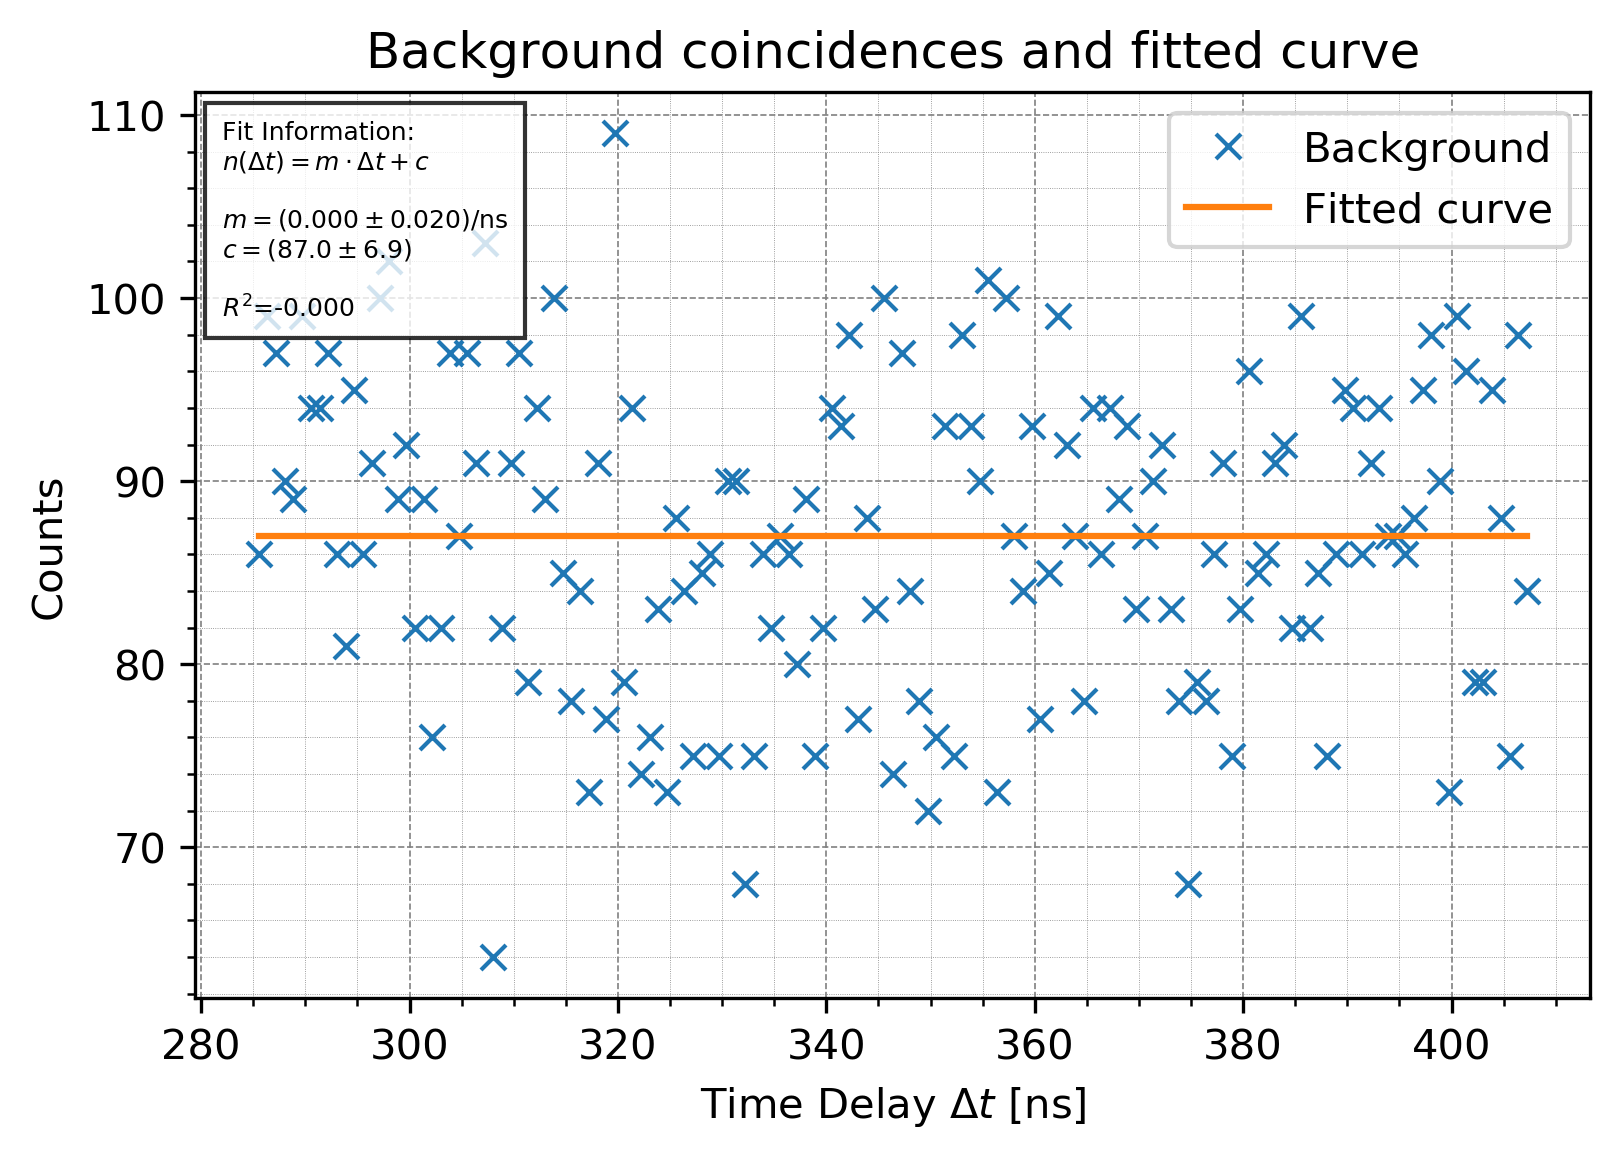

In [19]:
from uncertainties import unumpy as unp
x=np.linspace(-20,200)
y=x*slope+offset
plt.figure(dpi=300)
plt.title(r'Background coincidences and fitted curve')
plt.ylabel(r'Counts')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')

#plt.plot(val(data[0]),val(data[1]),"x",label="All datapoints")
#plt.plot(val(data[0][start:stop]),val(data[1][start:stop]),"x",label="Fitted")
plt.plot(val(data[0][start2:stop2]),val(data[1][start2:stop2]),"x",label="Background")
plt.plot(val(data[0][start2:stop2]),
         val((slope2*(data[0][start2:stop2]))+offset2),label="Fitted curve")

plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()

plt.legend()
plt.text(282,99,
         'Fit Information:\n$n(\\Delta t)=m\\cdot \\Delta t +c $\n\n$m=({:.3f}\\pm {:.3f})$/ns\n$c=({:.1f}\\pm {:.1f})$\n\n$R^2$={:.3f}'
         .format(val(slope2),err(slope2),val(offset2),err(offset2),R_2_2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=6)
plt.savefig("lin_bkgnd.png")
plt.show()

# Fit w\o background

In [20]:
def expfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, a, b, c, d: a * np.exp(b * (x+d)) + c, p0=p0)

def eexp(x,a,b,c,d):
    return a * np.exp(b * (x+d)) + c

In [21]:
def fit_pm(x, y, func=lambda x: x, p0=None):
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, bounds=(0,100))
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2

In [22]:
#start,stop = 40,230


cleaned = [data[0],data[1]-(data[0]*slope2+offset2)]

x = cleaned[0][start:stop]
y = cleaned[1][start:stop]
vals2,x_2=expfit_pm(val(x),val(y),p0=[0,0.1,0,0])
print(vals2)
mlt=1/val(vals2[1])
print("mlt",mlt)
print(np.log(2)*mlt)
error_lin_val = (np.log(2)/((val(vals2[1]))**2))*err(vals2[1])
print("err",error_lin_val)
print(uncertainties.ufloat(np.log(2)*mlt,error_lin_val))
vertrag(np.log(2)*mlt,error_lin_val,98)

[31.384029592752256+/-4965214.327109668
 0.008026029691978881+/-0.0009592519795550696
 2.9314314229006267e-15+/-14.040349586099513
 15.198329730740882+/-19711900.491348695]
mlt 124.59460510087425
86.36239923865077
err 10.321828551368753
86+/-10


1.1274747205335045

In [23]:
#start-=ö
#stop-=ü


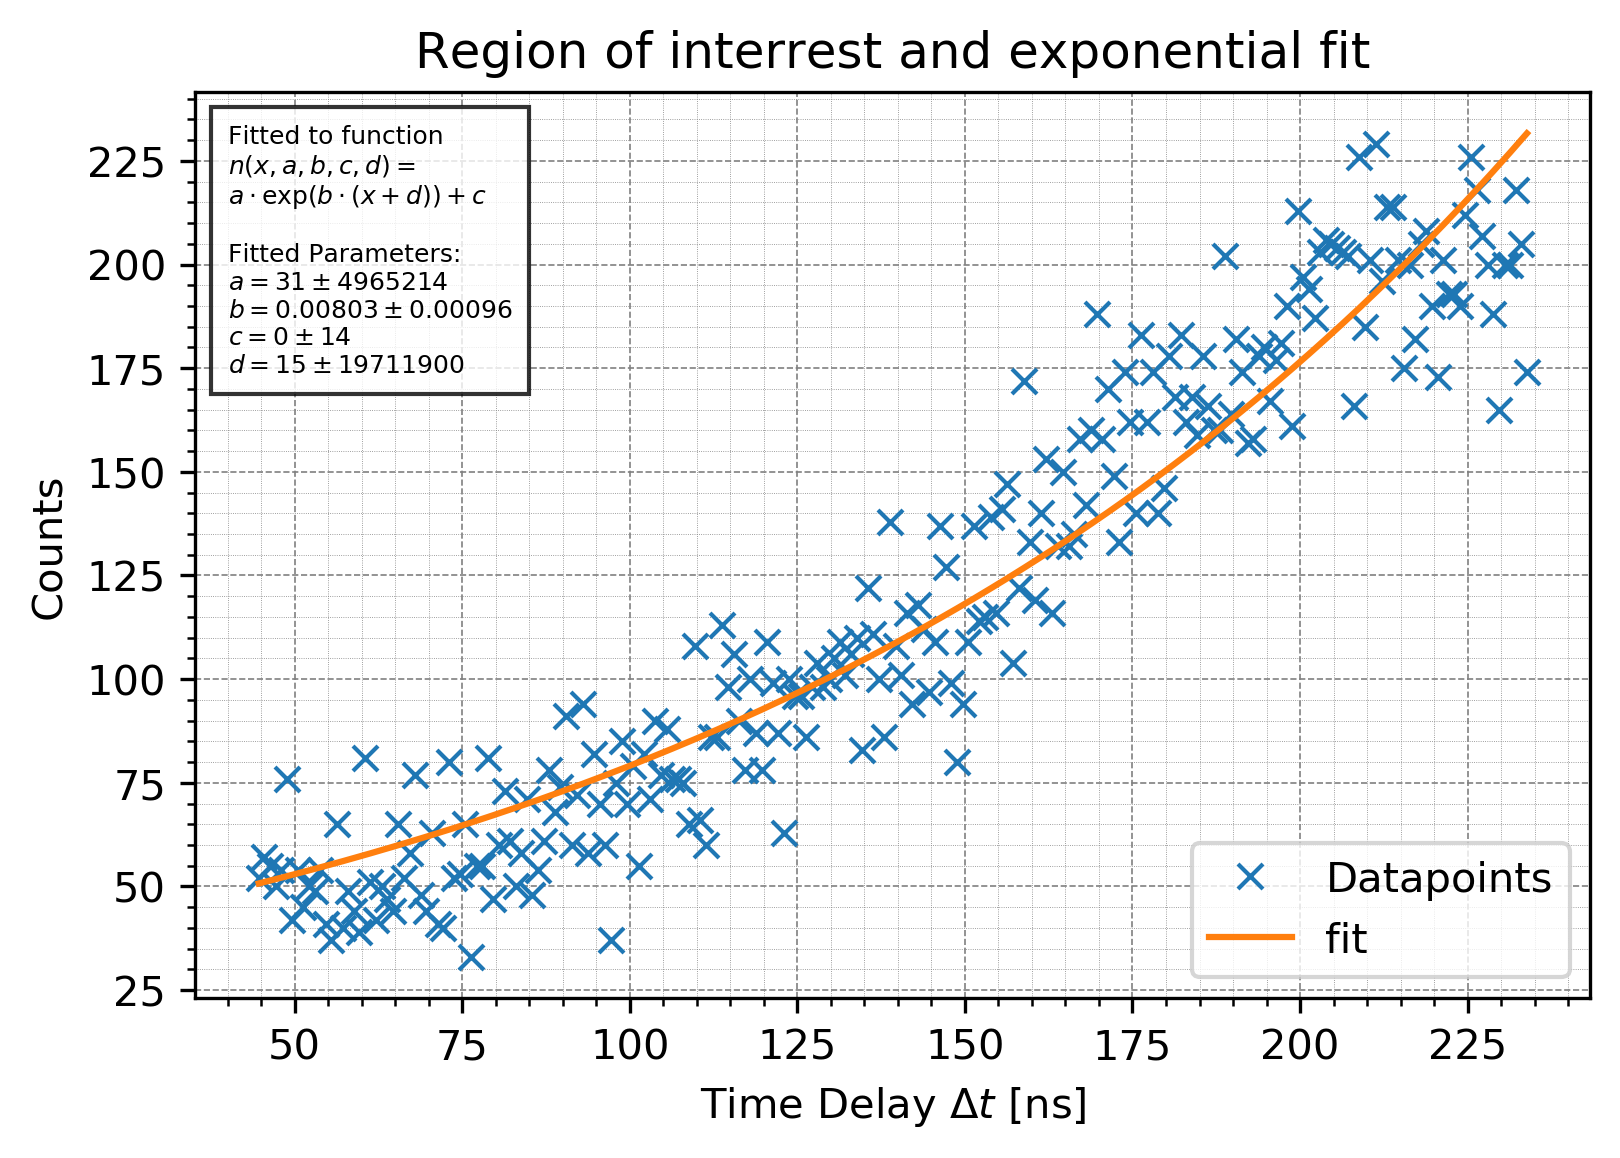

In [24]:
#kek = 30
#eke = -41
x = cleaned[0][start:stop]
y = cleaned[1][start:stop]

fact = 1e12

plt.figure(dpi=300)
plt.title(r'Region of interrest and exponential fit')
plt.ylabel(r'Counts')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')
plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()


#plt.plot(val(cleaned[0]), val(cleaned[1]),"x",label="raw- bkgndfit")
plt.plot(val(x),val(y),"x",label="Datapoints")
plt.plot(val(cleaned[0][start:stop]),eexp(val(cleaned[0][start:stop]),*val(vals2)),label="fit")

plt.text(40,174,
        r"Fitted to function" "\n" r"$n\left(x,a,b,c,d\right) =$"
         "\n" r"$ a \cdot \exp\left(b\cdot\left(x+d\right)\right) + c$"
         "\n\n" r"Fitted Parameters:"
         "\n" r"$a ={:.0f}\pm{:.0f}$"
         "\n" r"$b ={:.5f}\pm{:.5f}$"
         "\n" r"$c ={:.0f}\pm{:.0f}$"
         "\n" r"$d ={:.0f}\pm{:.0f}$".format(
         val(vals2[0]),err(vals2[0]),
         val(vals2[1]),err(vals2[1]),
         val(vals2[2]),err(vals2[2]),
         val(vals2[3]),err(vals2[3])
         ),
         #'Fit Information:\n$n(\Delta t)=m\cdot \Delta t +c $\n\n$m=({:.3f}\pm {:.3f})$/ns\n$c=({:.1f}\\pm {:.1f})$\n\n$R^2$={:.3f}'
         #.format(val(slope2),err(slope2),val(offset2),err(offset2),R_2_2),
         bbox={'facecolor':'white', 'alpha':0.8}, fontsize=6)
plt.legend(loc=4)
#axes=plt.gca()
#axes.set_xlim([150,300])
plt.savefig("lin_fit_exp.png")
plt.show()

# New Log ungewichtet

In [25]:
intern = []
for item in val(data[1]):
    if item !=0:
        intern.append(np.log(item))
    else:
        intern.append(item)

data_log = [val(data[0]),array(intern)]

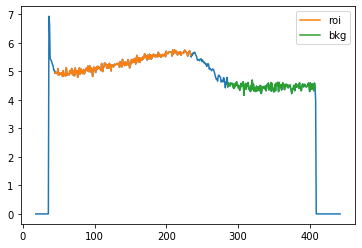

In [26]:
plt.plot(*data_log)
plt.plot(data_log[0][start:stop],data_log[1][start:stop],label="roi")
plt.plot(data_log[0][start2:stop2],data_log[1][start2:stop2],label="bkg")
plt.legend()
plt.show()

In [27]:
[slope2_log,offset2_log],R_2_2_log = linfit_pm(data_log[0][start2:stop2],data_log[1][start2:stop2])

print(slope2_log)
print(offset2_log)

0.00000+/-0.00023
4.46+/-0.08


In [28]:
def line(x,a,b):
    return x*val(a)+val(b)

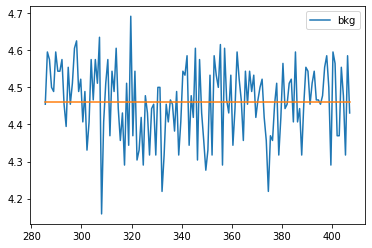

In [29]:
#plt.plot(*data_log)
#plt.plot(data_log[0][start:stop],data_log[1][start:stop],label="roi")
plt.plot(data_log[0][start2:stop2],data_log[1][start2:stop2],label="bkg")
plt.plot(data_log[0][start2:stop2],line(data_log[0][start2:stop2],slope2_log, offset2_log))
plt.legend()
plt.show()

In [30]:
data_log_clean=[data_log[0],(data_log[1]-line(data_log[0],slope2_log, offset2_log))]

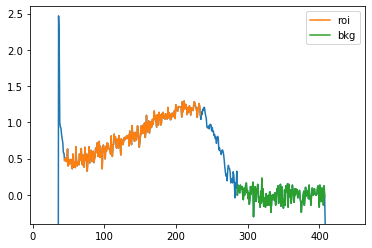

In [31]:
plt.plot(*data_log_clean)
plt.plot(data_log_clean[0][start:stop],data_log_clean[1][start:stop],label="roi")
plt.plot(data_log_clean[0][start2:stop2],data_log_clean[1][start2:stop2],label="bkg")

axes=plt.gca()
#axes.set_xlim([150,300])
axes.set_ylim([-0.4,2.6])
plt.legend()
plt.show()

In [32]:
[slope_log,offset_log],R_2_2_log = linfit_pm(data_log_clean[0][start:stop],data_log_clean[1][start:stop])
print(slope_log)
print(offset_log)
print("T_1/2",np.log(2)/slope_log)

0.00475+/-0.00010
0.167+/-0.015
T_1/2 146.0+/-3.0


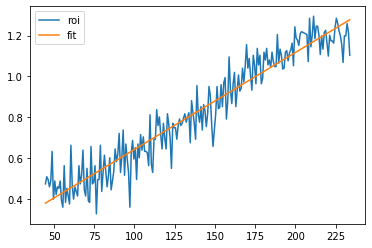

In [33]:
#plt.plot(*data_log_clean)
plt.plot(data_log_clean[0][start:stop],data_log_clean[1][start:stop],label="roi")
#plt.plot(data_log_clean[0][start2:stop2],data_log_clean[1][start2:stop2],label="bkg")
plt.plot(data_log_clean[0][start:stop],line(data_log_clean[0][start:stop],slope_log, offset_log),label="fit")

axes=plt.gca()
#axes.set_xlim([150,300])
#axes.set_ylim([-0.4,2.6])
plt.legend()
plt.show()

# New log gewichtet

In [310]:
def LRmG(x: list , y: list, u: list) -> list:
    """Linear Regression, weighted.
    
    """
    try:
        u[0]
        if (len(x) != len(y)):
            raise LenError
        if (len(x) != len(u)):
            raise LenError
        x = array(x)
        y = array(y)
        u = array(u)
        g = []
        for i in range(len(y)):
            g.append(1 / u[i] ** 2)

        a = (sum(g * (x ** 2)) * sum(g * y) - sum(g * x) * sum(g * x * y)) / (
                    sum(g) * sum(g * (x ** 2)) - (sum(g * x) ** 2))

        b = (sum(g) * sum(g * x * y) - sum(g * x) * sum(g * y)) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2)

        ua = sqrt(sum(g * x ** 2) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2))

        ub = sqrt(sum(g) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2))

        return a, b, ua, ub

    except TypeError:
        return LRmG(x, y, ones(len(y)) * u)

from uncertainties import unumpy

In [311]:
intern = []
intern_err = []
for item in (data[1]):
    if item !=0:
        intern.append(np.log(val(item)))
        intern_err.append(np.log(err(item)))
    else:
        intern.append(float(val(item)))
        intern_err.append(float(err((item))))

neew_intern=unumpy.uarray(intern,intern_err)
        
data_log = [val(data[0]),neew_intern]

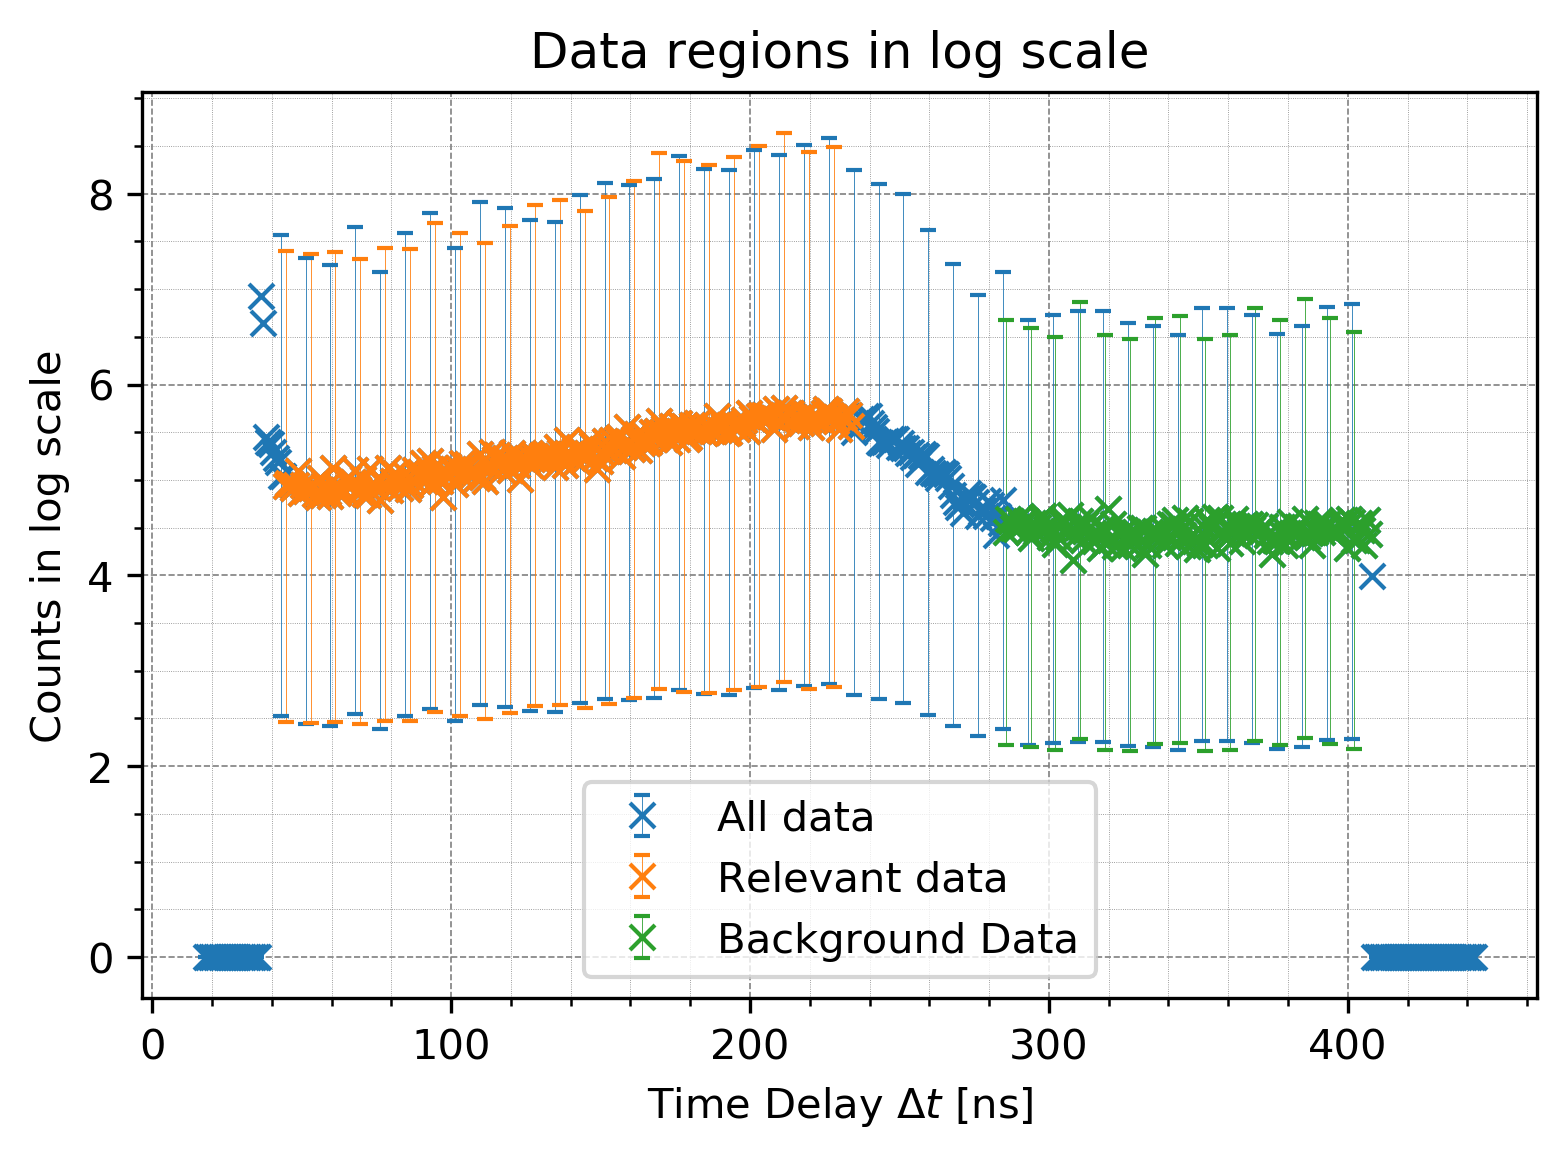

In [312]:
plt.figure(dpi=300)
plt.title(r'Data regions in log scale')
plt.ylabel(r'Counts in log scale')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')
plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()
plt.errorbar(*val(data_log),err(data_log[1]),fmt='x',elinewidth=0.2,capsize=2, label='All data',errorevery=10)
plt.errorbar(val(data_log[0][start:stop]),val(data_log[1][start:stop]),err(data_log[1][start:stop]),fmt='x',elinewidth=0.2,capsize=2, label='Relevant data',errorevery=10)
plt.errorbar(val(data_log[0][start2:stop2]),val(data_log[1][start2:stop2]),err(data_log[1][start2:stop2]),fmt='x',elinewidth=0.2,capsize=2, label='Background Data',errorevery=10)
plt.legend()
plt.savefig("data_log.png")
plt.show()

In [313]:
a2,b2,ua2,ub2 = LRmG(val(data_log[0][start2:stop2]),val(data_log[1][start2:stop2]),err(data_log[1][start2:stop2]))

bb2=uncertainties.ufloat(a2,ua2)
aa2=uncertainties.ufloat(b2,ub2)

print("offset",a2,ua2,bb2)
print("grad",b2,ub2,aa2)

offset 4.506420539767527 1.8182278232014286 4.5+/-1.8
grad -0.00014357143528400426 0.005221091362947063 -0.000+/-0.005


In [314]:
def line(x,a,b):
    return x*(a)+(b)

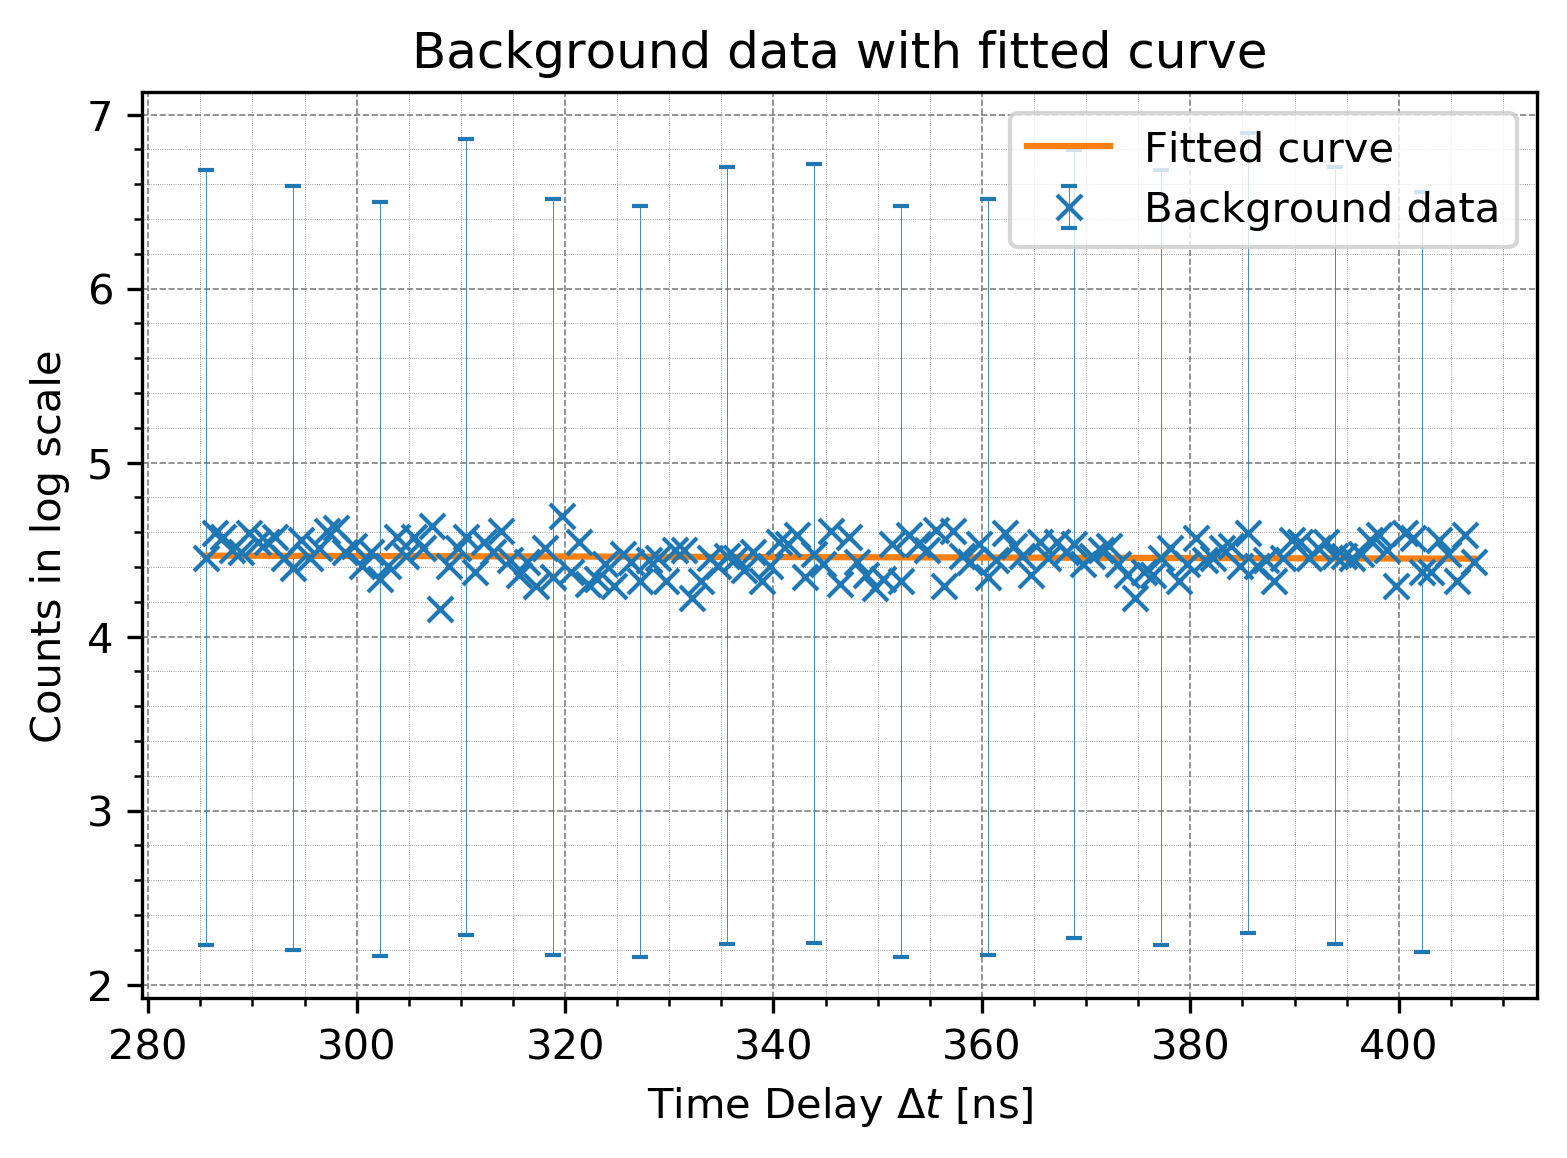

In [315]:
plt.figure(dpi=300)
plt.title(r'Background data with fitted curve')
plt.ylabel(r'Counts in log scale')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')
plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()
#plt.plot(*val(data_log))
#plt.plot(data_log[0][start:stop],data_log[1][start:stop],label="roi")
plt.errorbar(val(data_log[0][start2:stop2]),val(data_log[1][start2:stop2]),err(data_log[1][start2:stop2]),fmt='x',elinewidth=0.2,capsize=2, label='Background data',errorevery=10)
plt.plot(data_log[0][start2:stop2],line(data_log[0][start2:stop2],b2, a2),label="Fitted curve")
plt.legend()
plt.savefig("log_bkg.png")
plt.show()

In [316]:
data_log[0][0]*aa2

-0.0025783600846314234+/-0.09376414982414269

In [317]:
bb2

4.506420539767527+/-1.8182278232014286

In [318]:
data_log_clean=[data_log[0],(data_log[1]-line(data_log[0], aa2,bb2))]

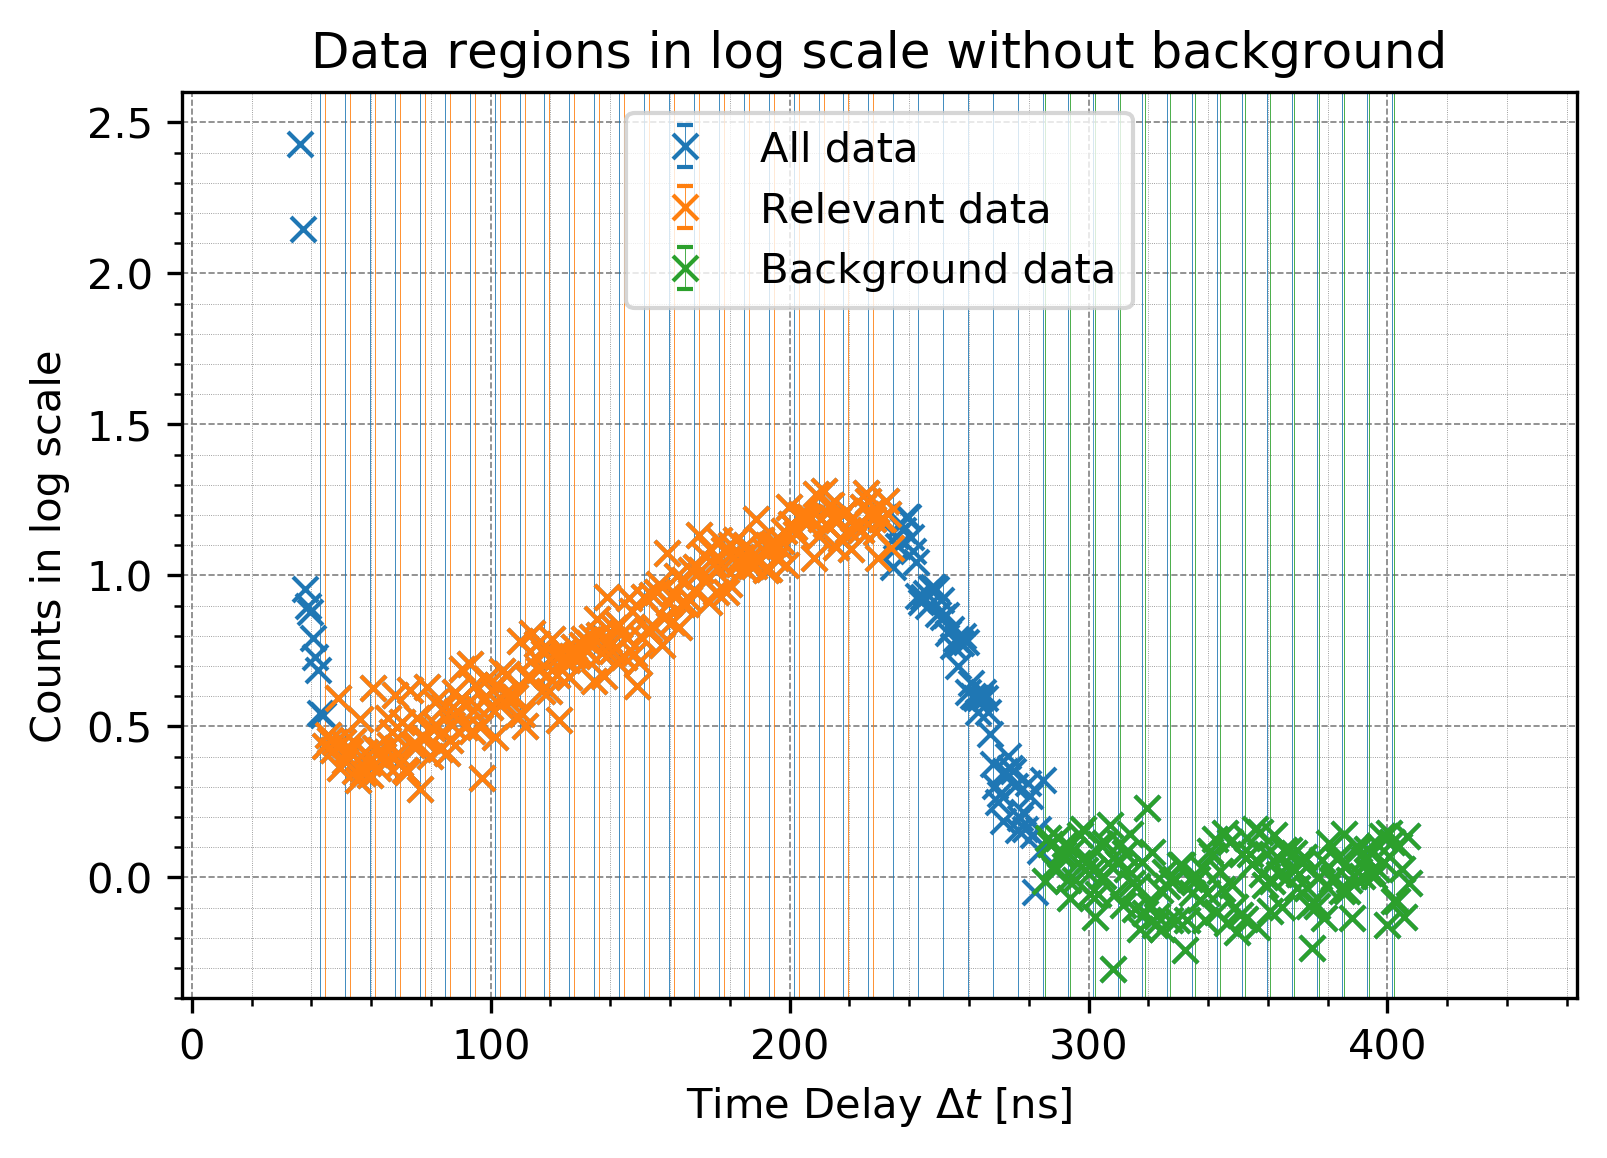

In [319]:
plt.figure(dpi=300)
plt.title(r'Data regions in log scale without background')
plt.ylabel(r'Counts in log scale')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')
plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()
plt.errorbar(*val(data_log_clean),err(data_log_clean[1]),fmt='x',elinewidth=0.2,capsize=2, label='All data',errorevery=10)
plt.errorbar(val(data_log_clean[0][start:stop]),val(data_log_clean[1][start:stop]),err(data_log_clean[1][start:stop]),fmt='x',elinewidth=0.2,capsize=2, label='Relevant data',errorevery=10)
plt.errorbar(val(data_log_clean[0][start2:stop2]),val(data_log_clean[1][start2:stop2]),err(data_log_clean[1][start2:stop2]),fmt='x',elinewidth=0.2,capsize=2, label='Background data',errorevery=10)
axes=plt.gca()
#axes.set_xlim([150,300])
axes.set_ylim([-0.4,2.6])
plt.legend()
plt.savefig("log_clean.png")
plt.show()

In [362]:
a,b,ua,ub = LRmG(val(data_log_clean[0][start:stop]),val(data_log_clean[1][start:stop]),err(data_log_clean[1][start:stop]))

bb=uncertainties.ufloat(a,ua)
aa=uncertainties.ufloat(b,ub)

print("slope_log",b,aa)
print("offset_log",a,bb)
mlt_log = 1/b
print(mlt_log)

print("T_1/2",(np.log(2)*mlt_log))
print("T_1/2_err",(np.log(2)/(b**2))*ub)
print(uncertainties.ufloat((np.log(2)*mlt_log),(np.log(2)/(b**2))*ub))
vertrag(numpy.log(2) * mlt_log,(np.log(2)/(b**2))*ub,98)

slope_log 0.004890010814632977 0.005+/-0.004
offset_log 0.12064206161015427 0.1+/-0.6
204.49852523998064
T_1/2 141.7475761987594
T_1/2_err 115.71820226279617
(1.4+/-1.2)e+02


0.3780526774811848

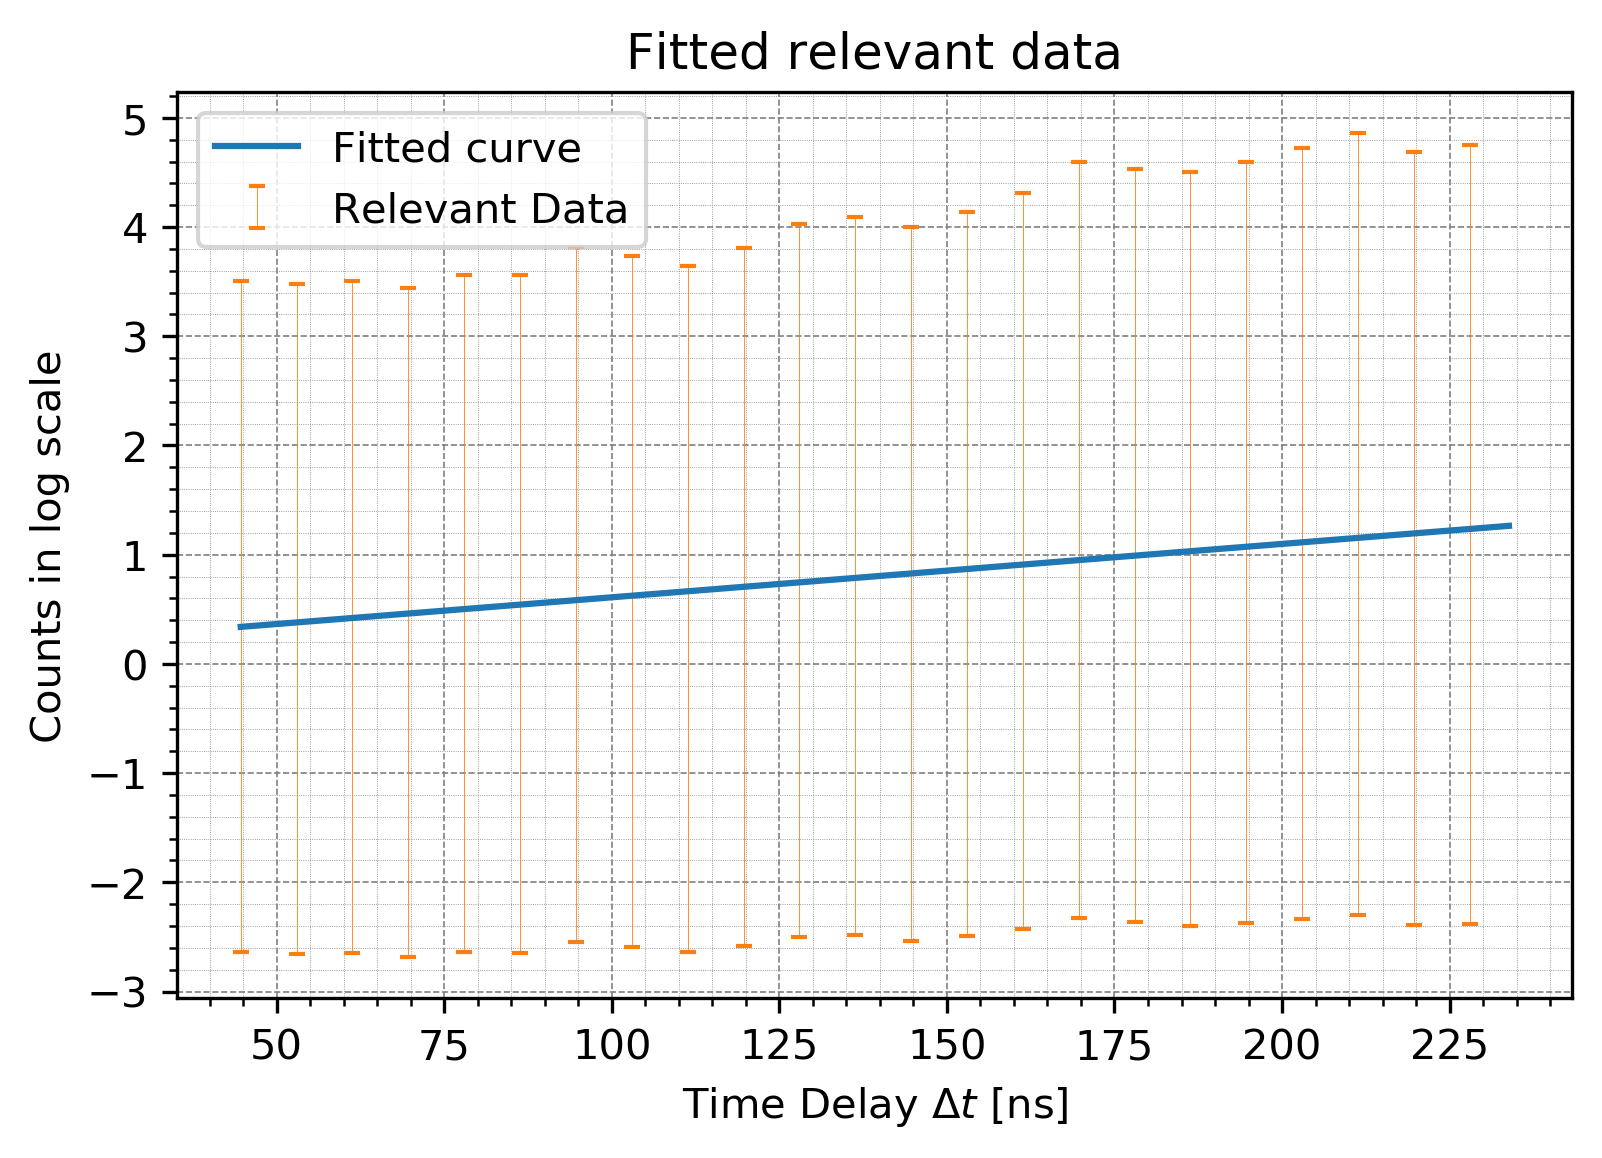

In [321]:
plt.figure(dpi=300)
plt.title(r'Fitted relevant data')
plt.ylabel(r'Counts in log scale')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')
plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()
#plt.plot(*data_log_clean)
plt.plot(val(data_log_clean[0][start:stop]),val(line(data_log_clean[0][start:stop],aa, bb)),label="Fitted curve")

plt.errorbar(val(data_log_clean[0][start:stop]),val(data_log_clean[1][start:stop]),err(data_log_clean[1][start:stop]),fmt=" ",elinewidth=0.2,capsize=2, label='Relevant Data',errorevery=10)
#plt.plot(data_log_clean[0][start2:stop2],data_log_clean[1][start2:stop2],label="bkg")


axes=plt.gca()
#axes.set_xlim([150,300])
#axes.set_ylim([-0.4,2.6])
plt.legend()
plt.savefig("log_relevant_fit.png")
plt.show()

# Log-BS

In [ ]:
def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        try:
            return x[0]
        except TypeError:
            return "not working"

log=[]
log.append(data[0])
log.append([])
for item in data[1]:
    try:
        log[1].append(unp.log(item))
    except ValueError:
        log[1].append(item)

In [ ]:
for i in range(len(log[1])):
    if log[1][i] == log[1][1]:
        print(i)

In [ ]:
len(newlog[0])

In [ ]:
# first zeros 0,21
# last zeros 470,509
newlog = [log[0][22:469],log[1][22:469]]
startlog,stoplog=start-21,stop-21
start2log,stop2log=start2-21,stop2-21
x = val(newlog[0])
y = []
y_err=[]
for item in newlog[1]:
    y.append(float(val(item)))
    y_err.append(float(err(item)))

In [ ]:
plt.plot(x,y,label="raw")
plt.plot(x[startlog:stoplog],y[startlog:stoplog],label="data")
plt.plot(x[start2log:stop2log],y[start2log:stop2log],label="bkg")
plt.legend()
plt.show()

In [ ]:
fit2x,fit2y=x[start2log:stop2log],y[start2log:stop2log]
[slope2log,offset2log],R_2_2log = linfit_pm(fit2x,fit2y)
print(slope2log)
print(offset2log)

In [ ]:
cleanedlog=[x,y-(x*slope2log+offset2log),y_err]

In [ ]:
fitx,fity=cleanedlog[0][startlog:stoplog],val(cleanedlog[1][startlog:stoplog])
[slopelog,offsetlog],R_2_log = linfit_pm(fitx,fity)
print(slopelog)
print(offsetlog)

In [ ]:
unp.log(2)/slopelog

In [ ]:
%pylab inline
import uncertainties
# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path+".TKA", 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

In [ ]:
from uncertainties import unumpy as np
log_raw = read("Hauptmessung")
log_data = [log_raw[0],[]]
#fehler: sqrt(n)
for i in range(len(log_raw[1])):
    try:
        log_data[1].append(unp.log(uncertainties.ufloat(log_raw[1][i],np.sqrt(log_raw[1][i]))))
    except ValueError:
        log_data[1].append((uncertainties.ufloat(log_raw[1][i],np.sqrt(log_raw[1][i]))))
#len(log_data[1])
#intern = []
#for i in range(len(log_data[1])):
#    if log_data[1][i] > 0:
#        intern.append(unp.log(log_data[1][i]))
#    else:
#        intern.append(log_data[1][i])
#log_data.append(intern)

In [ ]:
x = log_data[0]
y = []
y_err=[]
for item in log_data[1]:
    y.append(val(item))
    y_err.append(err(item))
#y = val(log_data[1])
plt.figure(dpi=150)
plt.errorbar(x,y,y_err,fmt=":",label="raw")
plt.plot(x[start:stop],y[start:stop],label="cut")
plt.plot(x[start2:stop2],y[start2:stop2],label="backgr")

plt.show()

[slope2_log,offset2_log],R_2_2_log = linfit_pm(log_data[0][start2:stop2],y[start2:stop2],[0,5])
print(slope2_log,offset2_log)
buffer = []
